<a href="https://colab.research.google.com/github/ardalanebrahimi/EDU/blob/master/Deep%20Learninn-Ex01-IMDB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from keras.datasets import imdb

(train_data,train_labels),(test_data, test_labels) = imdb.load_data(num_words=10000)
train_labels[0]

word_index = imdb.get_word_index()

In [0]:
reverse_word_index = dict([(value,key) for (key,value) in word_index.items()])
decode_review  = ' '.join([reverse_word_index.get(i-3,'?') for i in train_data[0]])

import numpy as np
def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences),dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1.
  return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [0]:
from keras import models
from keras import layers
model = models.Sequential()

model.add(layers.Dense(16, activation='tanh', input_shape=(10000,)))
model.add(layers.Dense(16, activation='tanh'))
model.add(layers.Dense(1, activation='sigmoid'))

#output = relu(dot(input, W) + b)
#model.compile(optimizer='rmsprop'
#              ,loss='binary_crossentropy',
#              metrics=['accuracy'])    

from keras import optimizers
from keras import losses
from keras import metrics

model.compile(optimizer=optimizers.RMSprop(lr=0.001)
              ,loss=losses.binary_crossentropy,
              metrics=[metrics.binary_accuracy])    

x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [59]:
history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs=20,
                   batch_size = 512,
                   validation_data = (x_val,y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 3s 175us/step - loss: 0.5113 - binary_accuracy: 0.8046 - val_loss: 0.3889 - val_binary_accuracy: 0.8709
Epoch 2/20
15000/15000 [==============================] - 2s 146us/step - loss: 0.3063 - binary_accuracy: 0.9035 - val_loss: 0.3114 - val_binary_accuracy: 0.8785
Epoch 3/20
15000/15000 [==============================] - 2s 146us/step - loss: 0.2136 - binary_accuracy: 0.9317 - val_loss: 0.2703 - val_binary_accuracy: 0.8916
Epoch 4/20
15000/15000 [==============================] - 2s 146us/step - loss: 0.1624 - binary_accuracy: 0.9483 - val_loss: 0.2727 - val_binary_accuracy: 0.8885
Epoch 5/20
15000/15000 [==============================] - 2s 146us/step - loss: 0.1243 - binary_accuracy: 0.9601 - val_loss: 0.3321 - val_binary_accuracy: 0.8753
Epoch 6/20
15000/15000 [==============================] - 2s 142us/step - loss: 0.0986 - binary_accuracy: 0.9693 - val_loss: 0.3310 - val_bi

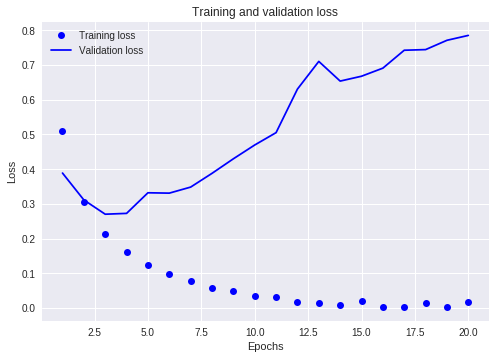

In [60]:
import matplotlib.pyplot as plt
history_dict = history.history
#history_dict.keys()
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label= 'Training loss')
plt.plot(epochs, val_loss_values, 'b', label= 'Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

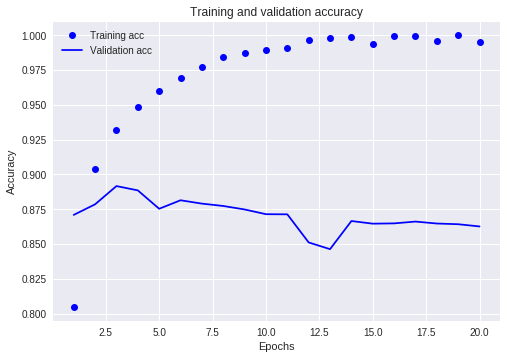

In [61]:
history_dict.keys()
plt.clf()
acc_values = history_dict['binary_accuracy']
val_acc_values = history_dict['val_binary_accuracy']

plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


In [62]:

model = models.Sequential()

model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop'
              ,loss='binary_crossentropy',
              metrics=['accuracy'])    

model.fit(x_train,y_train,epochs=4,batch_size = 512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
25000/25000 [==============================] - 3s 131us/step - loss: 0.4437 - acc: 0.8228
Epoch 2/4
25000/25000 [==============================] - 3s 107us/step - loss: 0.2579 - acc: 0.9070
Epoch 3/4
25000/25000 [==============================] - 3s 109us/step - loss: 0.1966 - acc: 0.9297
Epoch 4/4
25000/25000 [==============================] - 3s 117us/step


In [63]:
results

[0.30080598422050475, 0.88064]

In [0]:
model.predict(x_test)

array([[0.16032566],
       [0.9998487 ],
       [0.3835661 ],
       ...,
       [0.08045009],
       [0.04845066],
       [0.45574993]], dtype=float32)